In [1]:
from comp_optics_utilities import *

#progress bar
from tqdm import tqdm

#Useful to make spider aperture
from scipy.ndimage import rotate

In [2]:
#Parameters for the simulation

c = 3 * 10**8 #m/s

#Simulation points
N = 256
#Size of simulation region
D = #10x the aperture roughly, big enough to avoid error build up


#Light wavelength
lamb = 1000 * nanometer


#Reflectivity of the output mirror
R = #Based off of analytic estimate, higher will guarentee the cavity to start

#Cavity mirror focal lengths, the curvature of a mirror can provide the same lensing as a non-vaccuum material lens
f1=2.0*meter
f2=5*meter

#Parameters of the length L gain medium
Isat, alpha = 120 * 10**4, 0.5


power = 1 #Watts

#Power of random radiation, should be much less than our expected
#saturated power
power_random = 0.0001


#Cavity length
L = 300  * millimeter

#Number of bounces to make on the laser amplitude
iterations = 100

#Roundtrip time for the beam assuming it is nearly axial
dt = 2 * L / c 

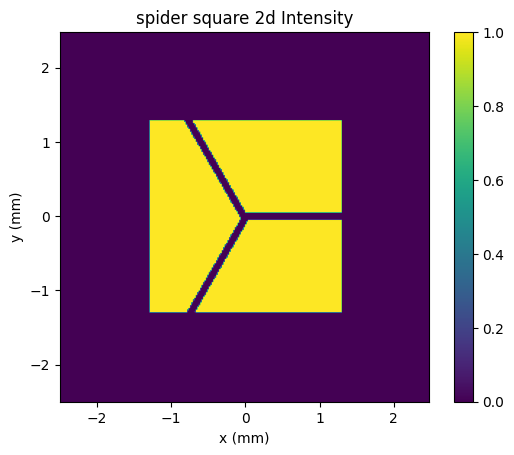

In [3]:
def spider_aperture(coordinates, r_outer,arm_thickness,N_arm,sq = False):
    
    #An open aperture
    aperture = np.zeros(coordinates[:,:,0].shape) + 1.0
    
    r_squared = coordinates[:,:,0]**2 + coordinates[:,:,1]**2
    
    #Outer circular aperture zeroed, or square
    if not sq:
        aperture[r_squared > r_outer**2] = 0.0
    #Square case
    else:
        aperture[coordinates[:,:,0] > r_outer] = 0.0
        aperture[coordinates[:,:,0] < -r_outer] = 0.0
        aperture[coordinates[:,:,1] < -r_outer] = 0.0
        aperture[coordinates[:,:,1] > r_outer] = 0.0
        
    
    #Make a blocking arm 
    arm_primitive = np.zeros(coordinates[:,:,0].shape) + 1.0
    arm_primitive[np.logical_and(coordinates[:,:,0] > -0.02 * r_outer,np.logical_and(coordinates[:,:,0] < r_outer* 2, np.logical_and(coordinates[:,:,1] < arm_thickness/2,coordinates[:,:,1] > -arm_thickness/2)))] = 0.0
    
    #Impose rotated blocking arms to make the "spider" aperture
    for i in range(N_arm):
        arm_rot = rotate(arm_primitive, i * 360 / N_arm, reshape = False)
        aperture = aperture * arm_rot
    
    #Round up all aperture values, this is a binary aperture
    aperture[aperture>0.5] = 1.0
    
    return aperture 


#Generate the simulation grid
gridcoords = generate_2d_coordinates(256,5 * millimeter)

plot_2d_intensity(gridcoords, spider_aperture(gridcoords, 1.3 * millimeter, 0.1 * millimeter,3,True), "spider square")
plt.show()


Task:
Implement grid_aperture(coordinates, r_outer, arm_thickness, N_x, N_y, sq = False)
Where coordinates is the grid points to sample the aperture at, r_outer is the radius of a circular hole, or half the side length of a square hole if sq = True. Argument arm_thickness defines how thick to make the blocking bars, and N_x, N_y, give the number of gridlines or bars which run in the x and y transverse directions.


In [4]:
def grid_aperture(coordinates, r_outer,arm_thickness,N_x,N_y,sq = False):
        #An open aperture
    aperture = np.zeros(coordinates[:,:,0].shape) + 1.0
    
    r_squared = coordinates[:,:,0]**2 + coordinates[:,:,1]**2
        #Outer circular aperture zeroed, since it is blocked
    #Zero an outer aperture (possibly square or circular shape)
    #...
        
    #N_x/y bars will separate N_x/y + 1 regions, find the size of these regions to find the bar spacing
    #...
    
    #Iterate horizontal and vertical gridlines
    #...
        
    return aperture


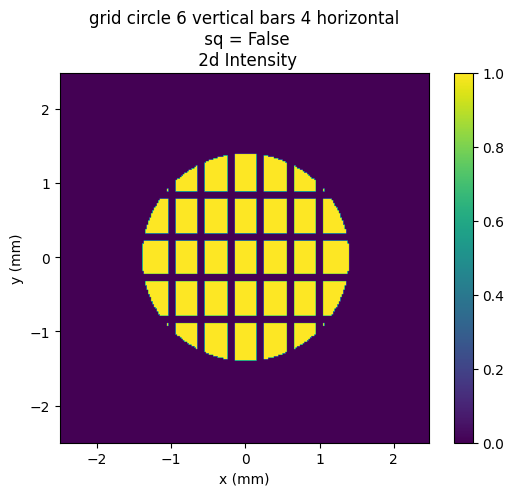

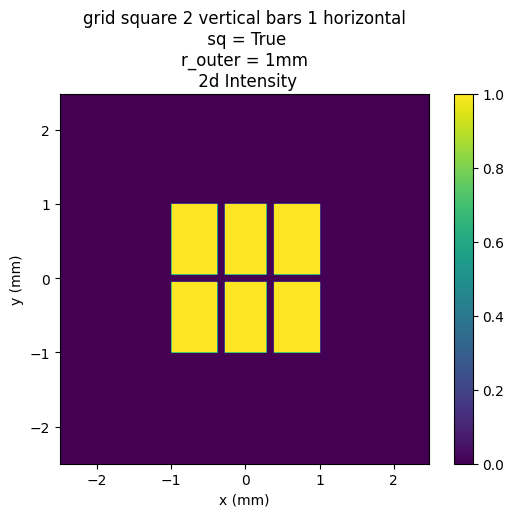

In [5]:


#Do some example apertures
plot_2d_intensity(gridcoords, grid_aperture(gridcoords, 1.4 * millimeter, 0.1 * millimeter,6,4,False), "grid circle 6 vertical bars 4 horizontal\n sq = False\n")
plt.show()

plot_2d_intensity(gridcoords, grid_aperture(gridcoords, 1* millimeter, 0.1 * millimeter,2,1,True), "grid square 2 vertical bars 1 horizontal\n sq = True\nr_outer = 1mm\n")
plt.show()


Task: Implement random_amplitude(coordinates)
This function should return an amplitude pattern where each amplitude sample is randomly and independently identically distributed about zero. The returned pattern should have amplitude normalized in the sense that the sum of square amplitude samples should be 1.0. Careful use of normalization will allow the power and thus intensity of the beam to be kept track of.



In [6]:
#Return a random unit magnitude 2d amplitude field with per pixel uniform sample
def random_amplitude(gridcoords):
    ret = #use np.random.rand
    #Normalize

    return ret

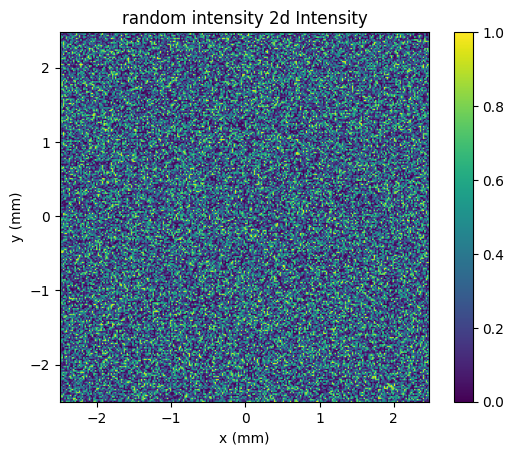

In [7]:
plot_2d_intensity(gridcoords, random_amplitude(gridcoords), "random intensity")
plt.show()

Task: Implement gain_sheet_saturable(coordinates, field,sat,alpha,power,size) 

In [8]:
#Implementation of lightpipes, see lightpipes laser_simulation
#An amplitude gain that reduces by a square root at the saturation intensity sat
#Assumes the gain can be modeled as a diffraction in vaccuum and then a gain effect at the furthest plane
#Note the conversion of a normalized amplitude and power, into intensity samples by dividing by the area of grid cells,
#and multiplying by the power
def gain_sheet_saturable(coordinates,field,sat,alpha,power,size):
    return 

Task: Implement propagate_roundtrip(coordinates, amplitude, power, aperture, R).

In [21]:
#Normalize is used in the sense that the sum of the square amplitude samples absolute value will be equal to 1.0
def propagate_roundtrip(coordinates, amplitude, power, aperture, R):
        H = "None" #Resuse the 30cm propgator to save computation
        #So that propagate_fresnel_transfer_2d doesnt have to do any
        #operations to determine the Transfer function
        
        #Add the sqrt(power) weighted amplitude to a generated random amplitude weighted sqrt(power_random)
        
        #... scale the normalized amplitude by the beam power
        amplitude += random_amplitude(coordinates) * #... add the random intensity
        
        
        #Calculate and store the new resultant power, then normalize
        #...

        #Apply the aperture to the normalized field
        #...

        #The field is no longer normalized after aperturing, in fact the remaining
        #square sum gives the fraction of power remaining after
        #the aperture, calculate and store a new power
        #...

        #Apply the aperture side lens (mirrors are curved inwards, and thus focusing)
        amplitude = amplitude * lens(#...)

        #Propagate through the gain medium
        #this is approximated as a vacuum propagation L
        #and then a gain factor dependent on intensity
        
        #Propagate and save the 30cm transfer function for reuse
        amplitude, H = propagate_fresnel_transfer_2d(#...)
        #Normalizing before applying the gain will make power calculation easy
        amplitude = normalize(amplitude)
        amplitude *= gain_sheet_saturable(coordinates, amplitude, Isat, alpha, power, L)

        #Normalize the intensity after the propagation and gain, but calculate and store the 
        #gain increased power first
        power = #...
        

        #Apply exit side mirror, then normalize to be safe
        amplitude *= lens(#...)
        #...
        
        #Reduce the power in the cavity since (1 - R), R the reflectivity
        #escapes the cavity at mirror 2
        power *= #...
        
        #Propagate back to plane 1, normalize 
        amplitude, H = propagate_fresnel_transfer_2d(#...)
        #...normalize

        
        
        return amplitude, power

Task: Simulate 100 bounces with the aperture radius (use a circular aperture) approximately set to the width calculated above. Set  N_x, N_y = 0, so that the aperture is a simple circular hole. 

Task: As you iterate the bounces, save the output power, (1 - R) of the beam power, in an array. Plot the output power versus time. If your simulation is successful, it should grow until being approximately the power you estimated above, then becoming stable in time.

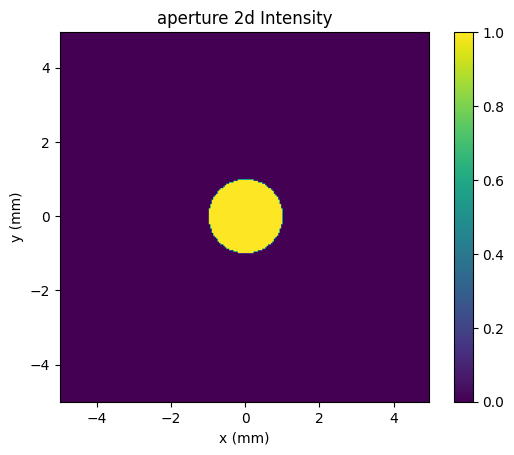

100%|█████████████████████████████████████████| 400/400 [00:09<00:00, 42.41it/s]


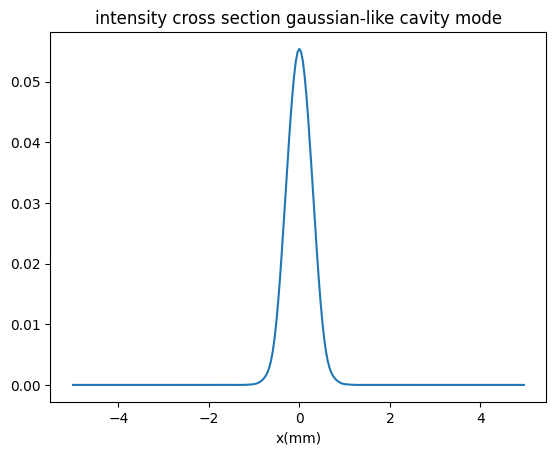

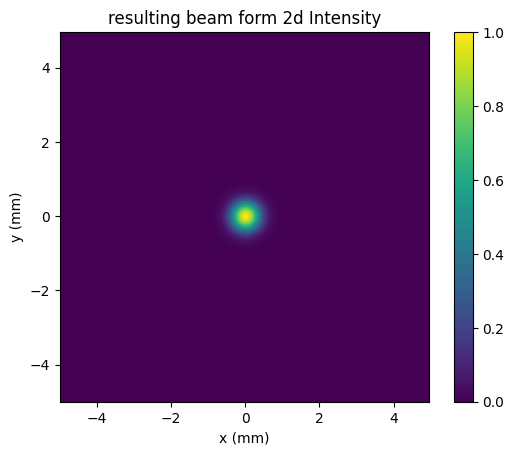

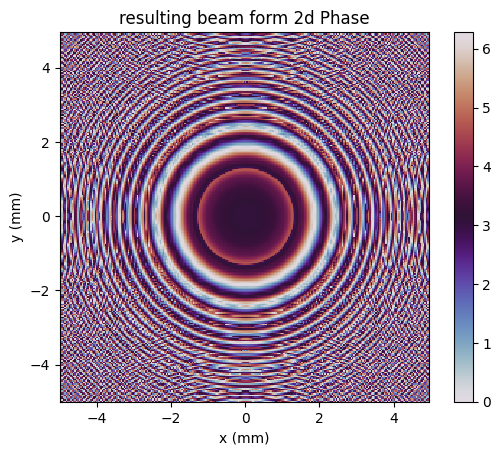

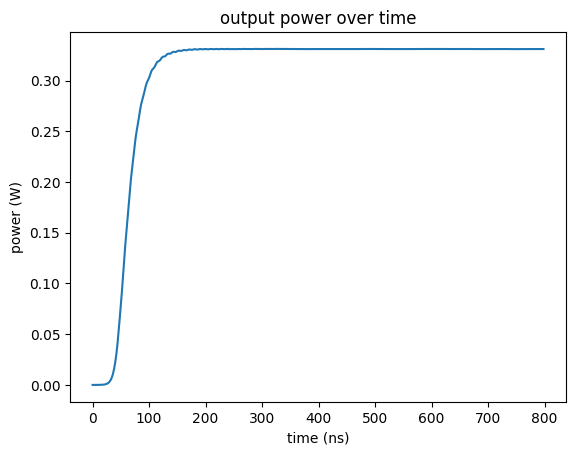

In [22]:
#Generate coordinates and an aperture that will produce a Gaussian
coordinates = generate_2d_coordinates(N, D)
aperture = grid_aperture(coordinates, #...aperture radius to produce a Gaussian mode, 0.01 * millimeter,0,0,False)

#Display the aperture
plot_2d_intensity(coordinates, aperture,"aperture")
plt.show()

#Start with a random low power light field
amplitude = random_amplitude(coordinates)
power = power_random

#Arrays to store simulation time and power output
powers = []
ts = [0]

#Iterate a bunch of bounces
for i in tqdm(range(iterations)):
    amplitude, power = #... one roundtrip simulation iteration we just implemented
    
    powers.append(power * (1 - R))
    ts.append(ts[-1] + dt)
    
ts = ts[:-1]

#Plot the mode 1d cross section
plt.title("intensity cross section gaussian-like cavity mode")
plt.plot(coordinates[128,:,0]/millimeter, np.abs(np.square(normalize(amplitude[:,128]))))
plt.xlabel("x(mm)")
plt.show()
    

#Plot the mode 2d intensity
plot_2d_intensity(coordinates, amplitude,"resulting beam form")
plt.show()

#Plot the mode 2d phase
plot_2d_phase(coordinates, amplitude,"resulting beam form")
plt.show()

#Plot the power of the beam over time
plt.title("output power over time")
plt.ylabel("power (W)")
plt.xlabel("time (ns)")
plt.plot(np.array(ts) * 10**9, powers)
plt.savefig("power over time example.png", dpi = 400)
plt.show()

Task: Implement beam_widths_with_40cm_lens(coordinates, ampl, plot = False) this function should Fresnel propagate an input amplitude and coordinates after being passed through an f = 40cm thin lens over some set of distances out to 90cm.

In [11]:
#Propagate a beam and calculate its widths to be returned
def beam_widths_with_40cm_lens(coordinates, ampl, plot = False):
    
    #Negative focal length for focusing!
    amplitude = ampl * lens(coordinates, -400 * millimeter, lamb)

    #Arrays to store the measured beam widths over propagation distances zs
    wxs = []
    wys = []
    zs = []


    #40 propagation points should be sufficient, start propagating
    #to a distance of 100mm where Fresnel approximation holds
    for i in range(40):
        ap, H = propagate_fresnel_transfer_2d(#...)
        if(plot):
            plot_2d_intensity(gridcoords,ap, "propagation 400mm lens")
            plt.show()

        wx,wy,cx,cy = #... calculate the width and centroid of the transverse amplitude
        zs.append(#...)
        wxs.append(wx)
        wys.append(wy)
    return zs, wxs, wys

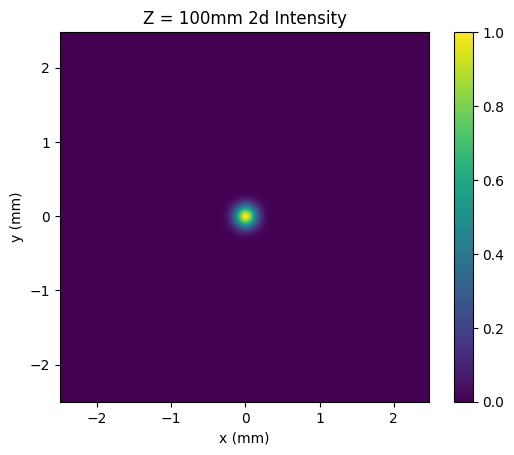

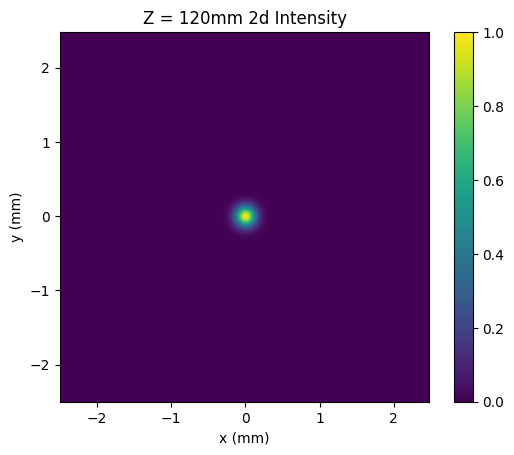

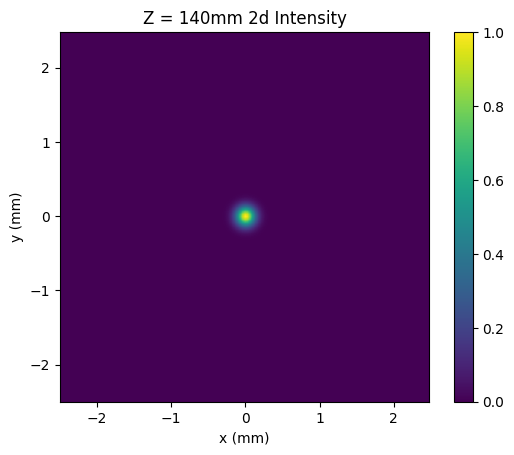

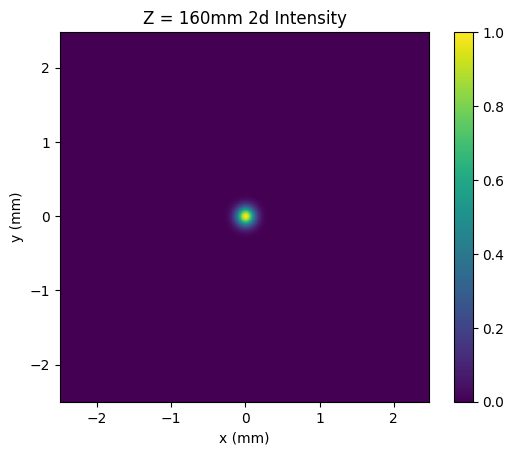

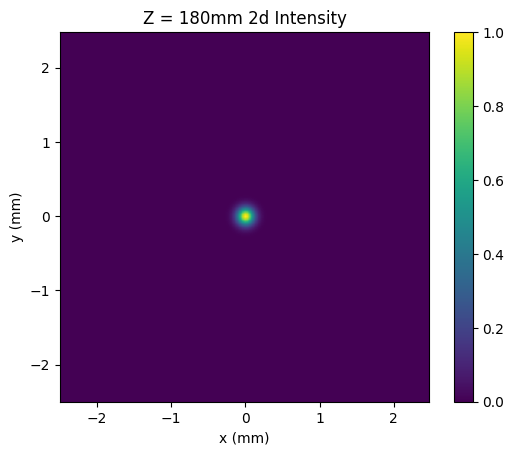

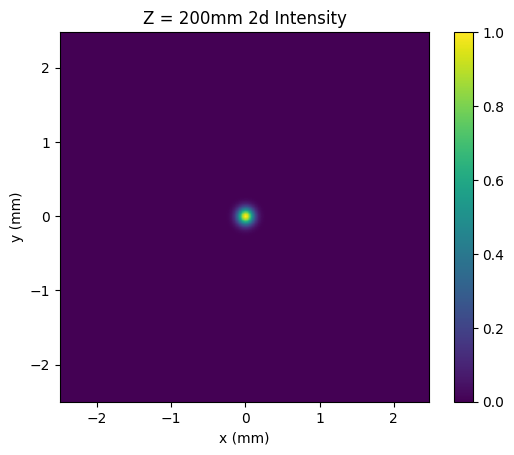

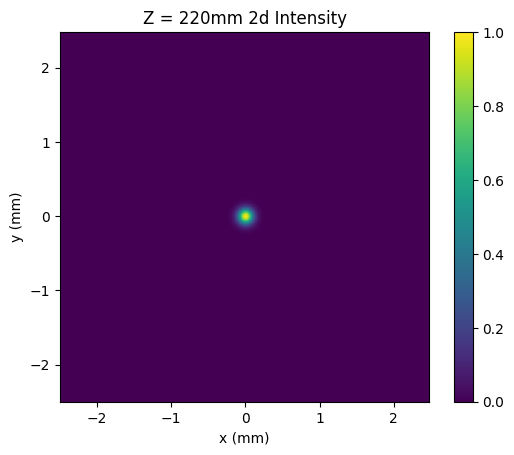

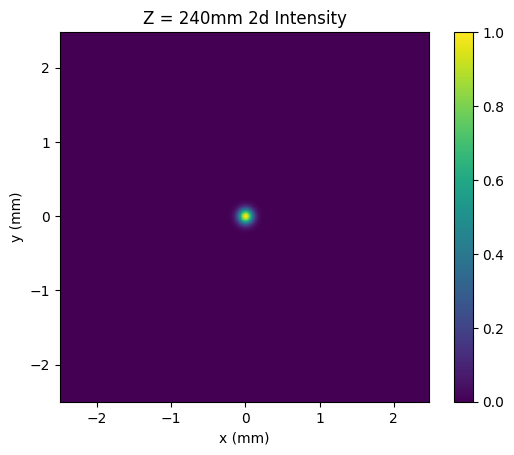

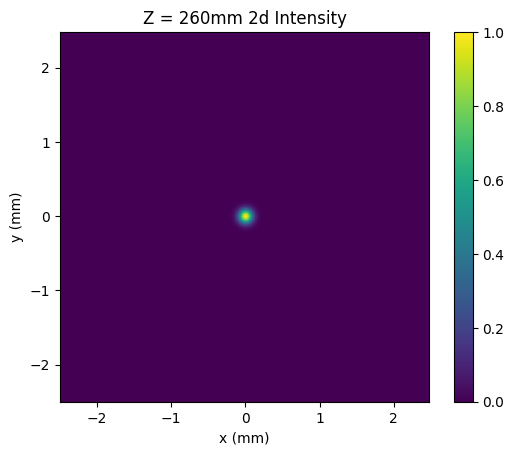

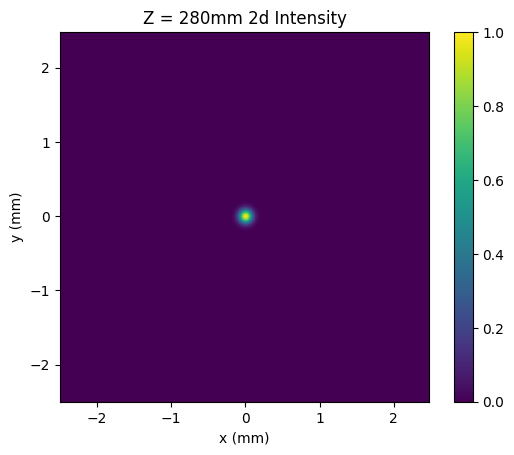

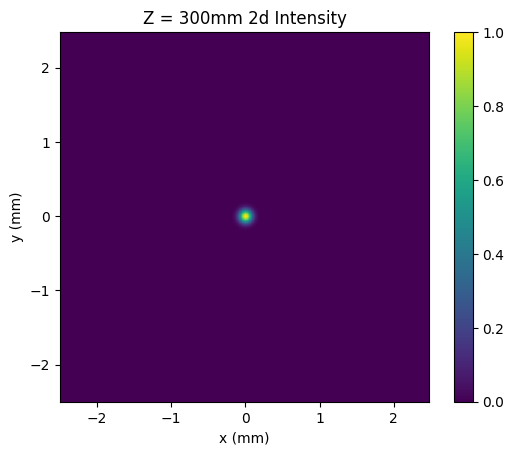

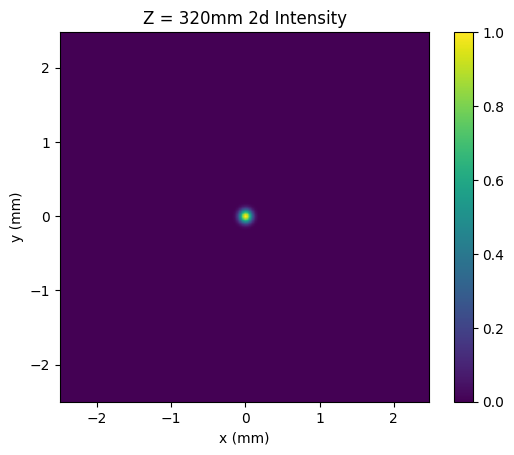

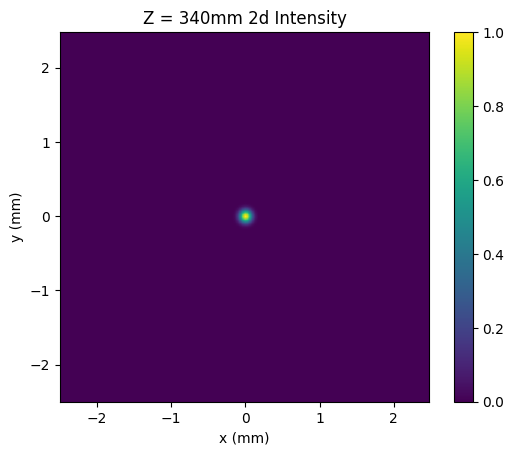

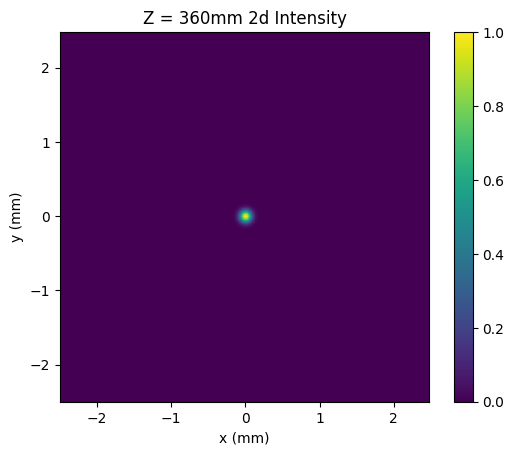

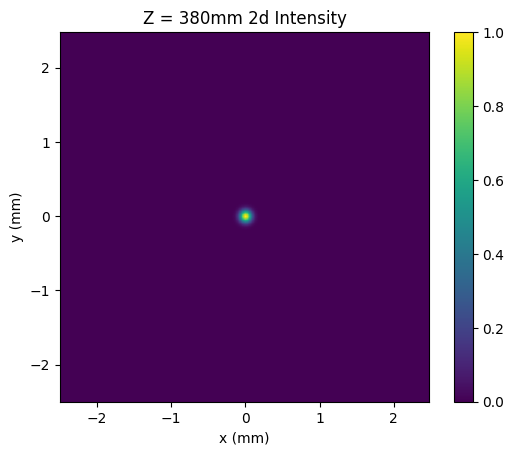

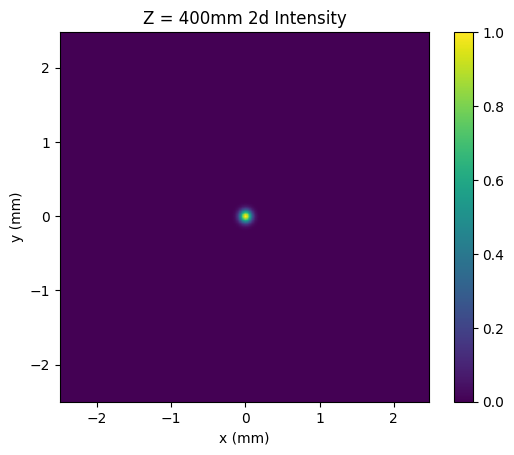

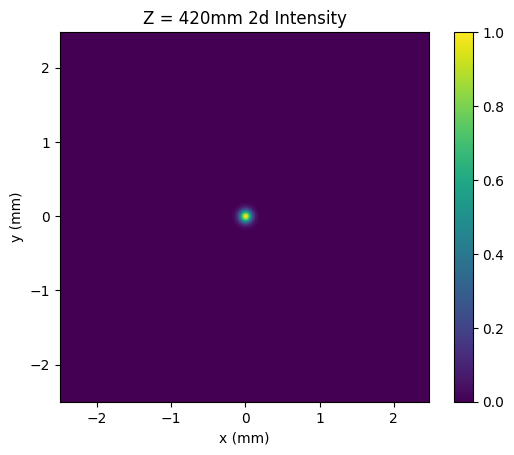

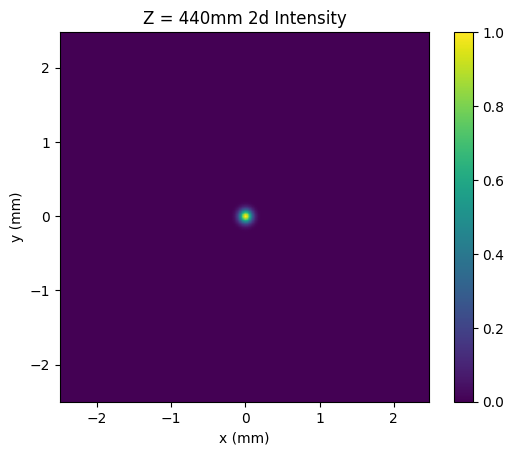

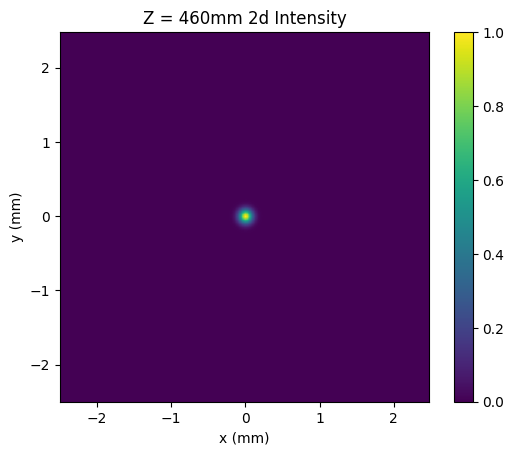

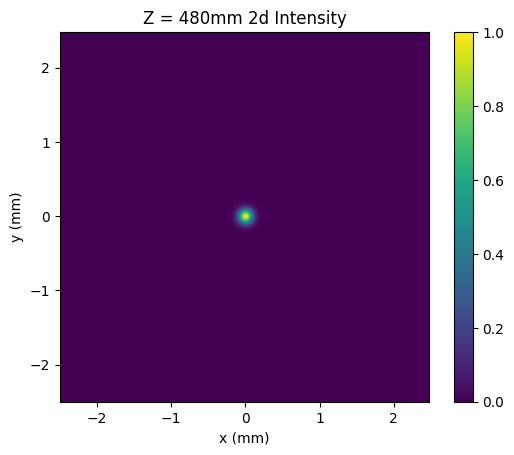

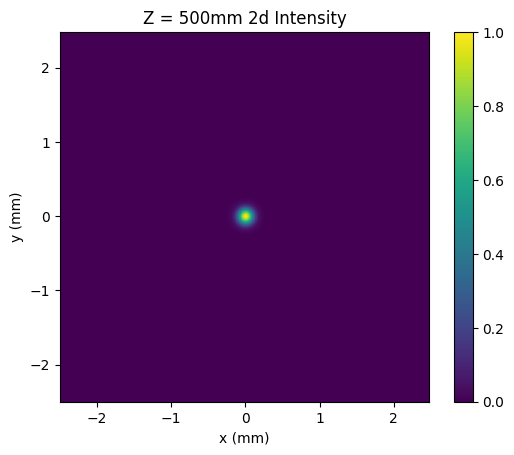

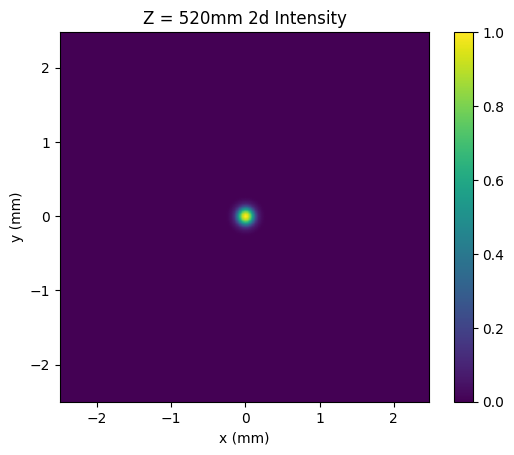

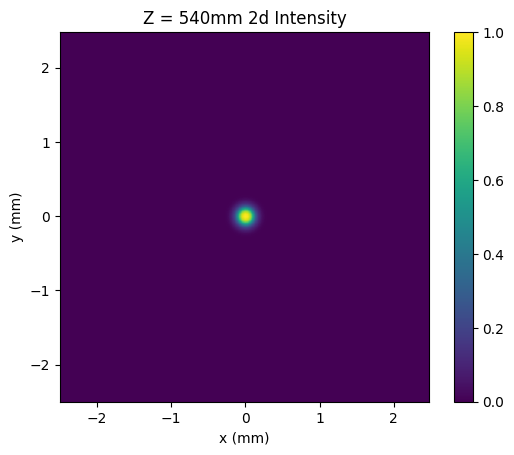

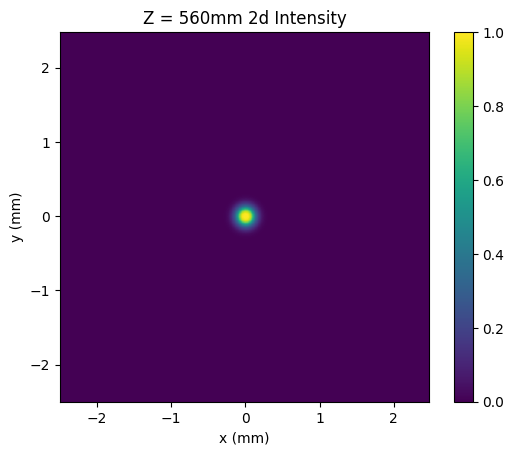

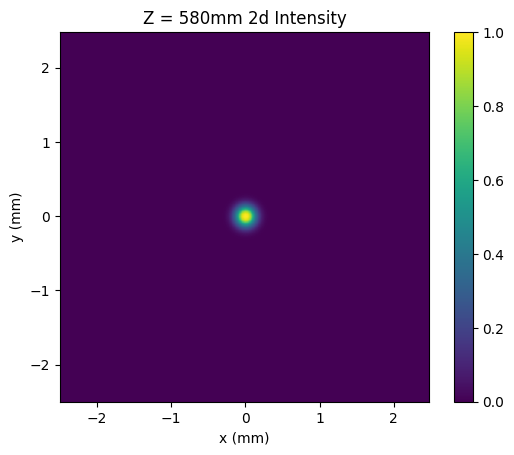

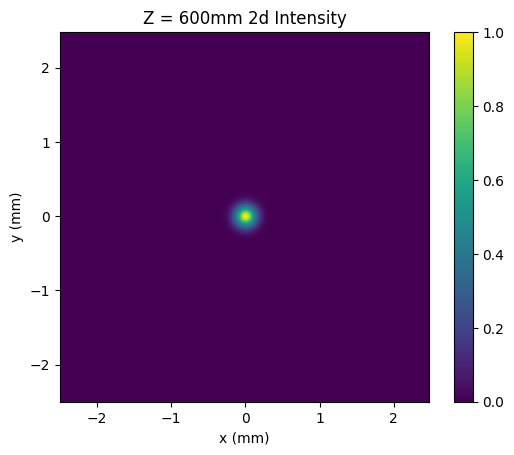

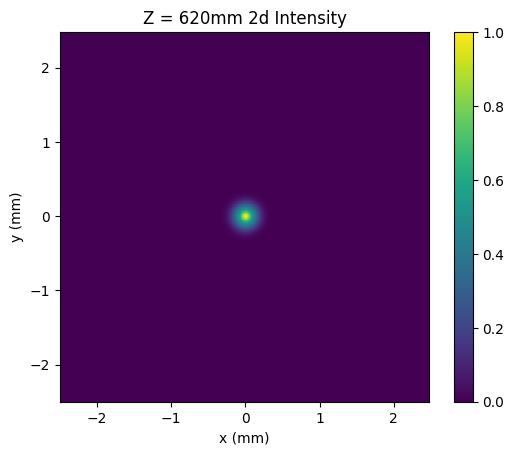

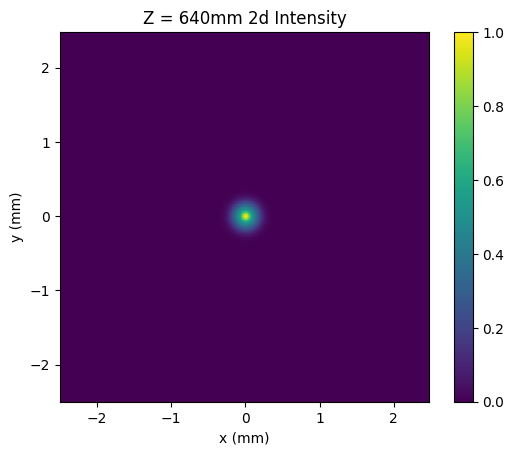

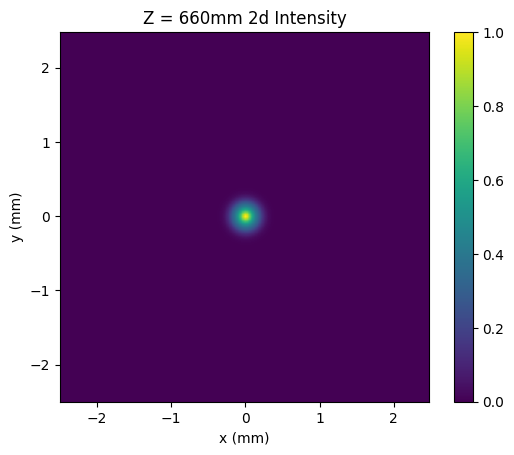

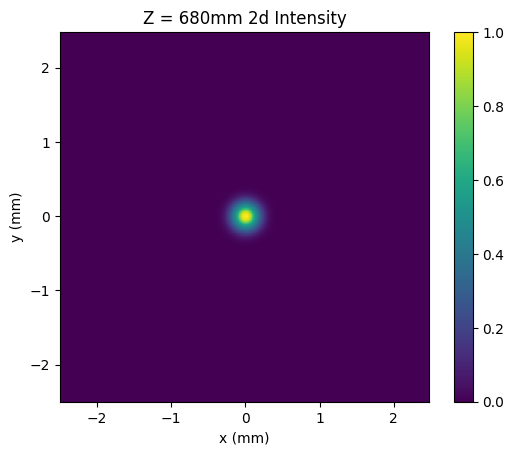

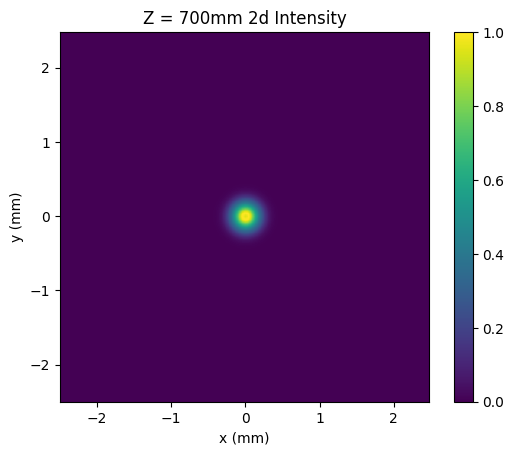

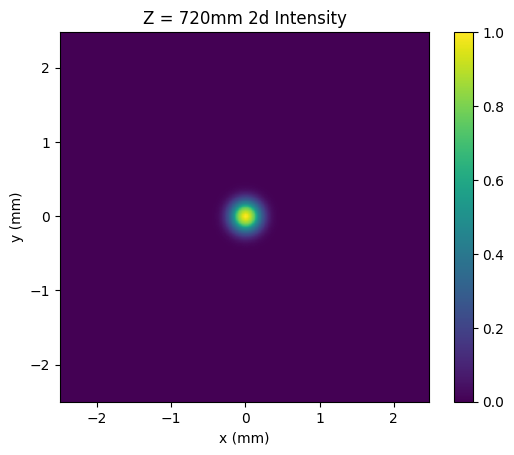

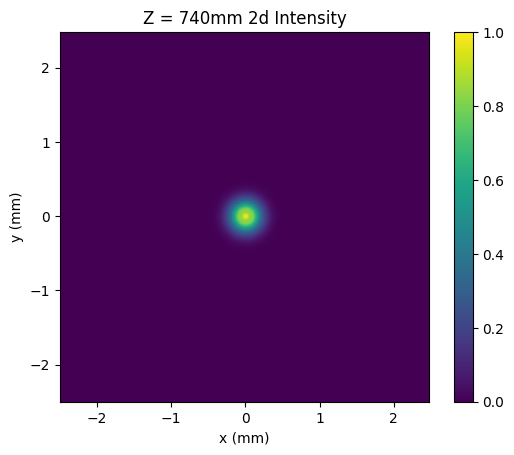

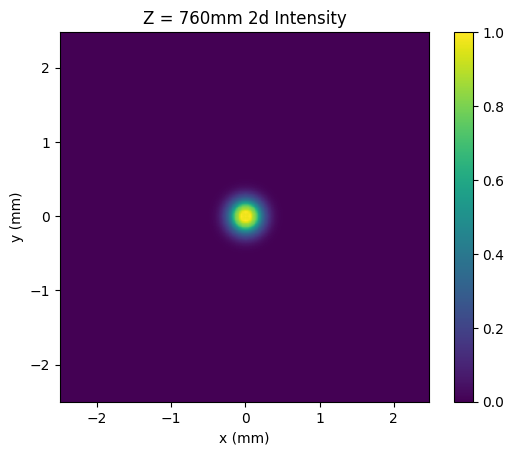

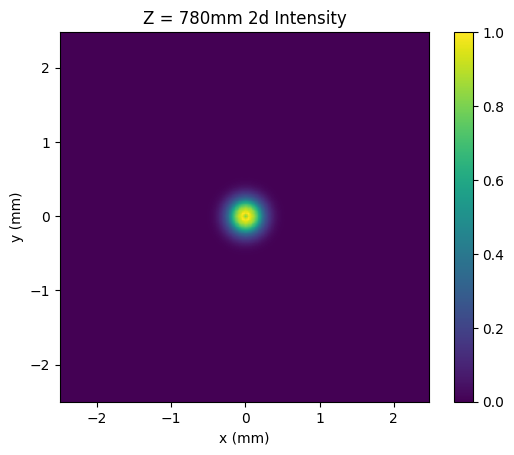

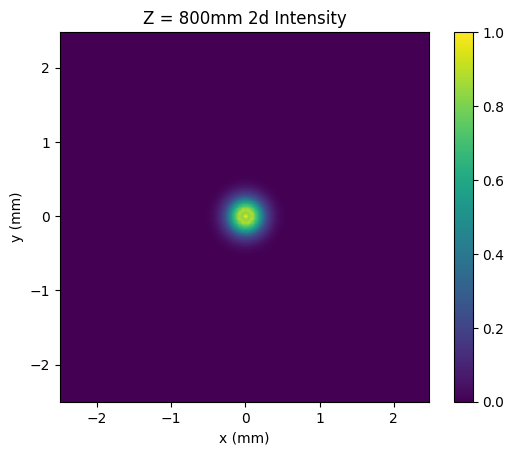

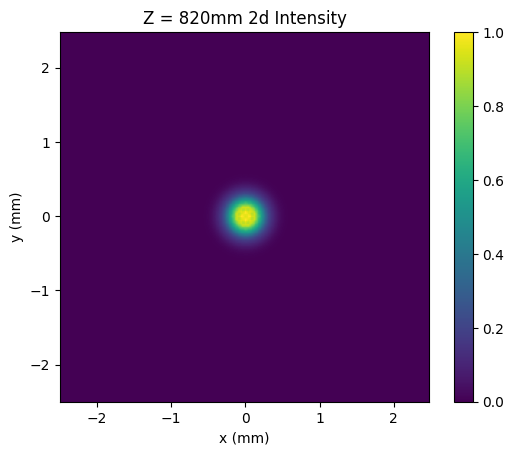

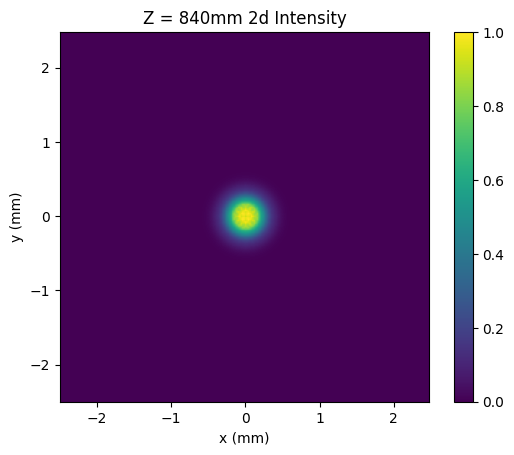

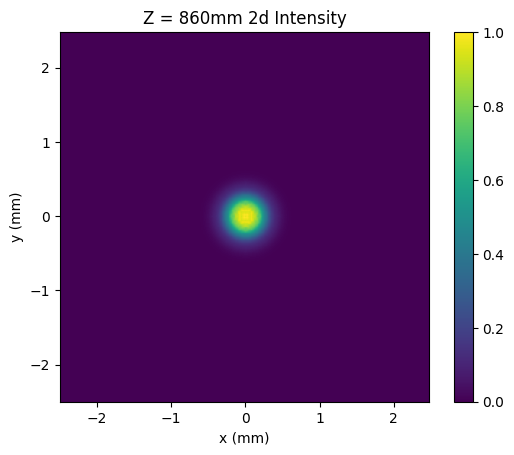

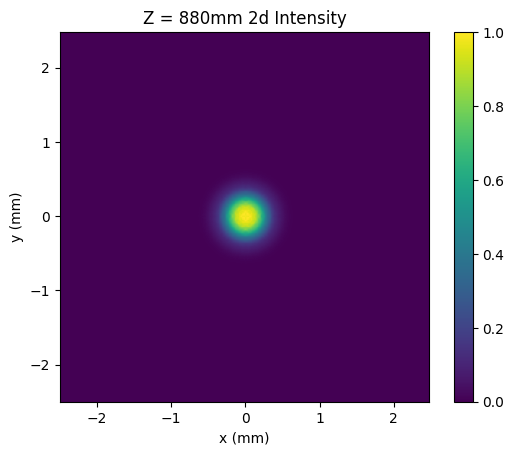

In [12]:
#Calculate an example Gaussian propagation outt of the cavity under 40cm lensing,
#we already generated a 
#Gaussian using the cavity simulation
zs, wxs, wys = beam_widths_with_40cm_lens(coordinates,amplitude, plot = True)

In [13]:
#The parabolic propagation form for widths
def W(z,W0,M2,z0):
    return np.sqrt(W0**2 + M2**2 * (lamb/np.pi/W0)**2 * (z - z0)**2)

Task: implement fit_widths_data(zs, wxs, wys) which takes the propagation distances and transverse widths, and fits two M2 model parameter sets (one for each transverse axis), which should be returned. This should be similar to the implementation of CHW7.

Task: Produce plots of the 2d beam intensity and phase for the nearly Gaussian mode of your cavity. Use the above two functions to calculate the M2 of the beam in both transverse axes. Produce fitting plots like those of CHW7:

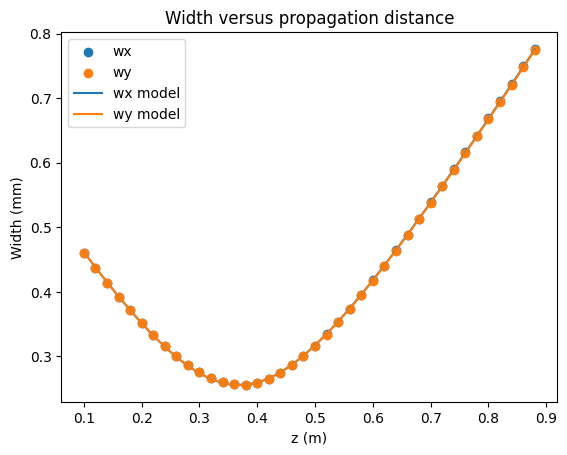

In [14]:
from scipy.optimize import curve_fit

#Our initial guess from curve fitting can come from a Gaussian beam focusing at 40cm
#p0 = [10**-4,1,0.4]

#Parameters fit for W0,M2,z0 for x/y-axis, note the width is twice the stddev width
def fit_widths_data(zs, wxs, wys):
    #... curve fit and return two sets of M2 model parameters, as a tupple like this ([w0x,m2x,z0x],[w0y,m2y,z0y])

#Use the fitting function
cfx, cfy = fit_widths_data(zs, wxs, wys)

#Plot the fits

plt.scatter(zs, 2 * np.array(wxs)/millimeter,label = "wx")
plt.scatter(zs, 2 * np.array(wys)/millimeter,label = "wy")

plt.plot(zs, W(zs, *cfx)/millimeter,label = "wx model")
plt.plot(zs, W(zs, *cfy)/millimeter,label = "wy model")

plt.xlabel("z (m)")
plt.ylabel("Width (mm)")
plt.title("Width versus propagation distance")
plt.legend()
plt.savefig("width_versus_z_model_fit.png", dpi = 400)
plt.show()


In [15]:
cfx

array([2.55661967e-04, 1.14944246e+00, 3.68642603e-01])

In [16]:
cfy

array([2.55677836e-04, 1.14819159e+00, 3.68861912e-01])

Task: Introduce a spider_aperture or grid_aperture (arm thickness of 0.01mm works for me) to your simulation, ie  N_x, N_y not 0, or N_arm not 0. These arms will block out lower order modes. You should also have to increase the aperture radius significantly to accommodate the higher order modes.

In [17]:
#Convenient to wrap up simulation and fitting code above into a nice function that takes in an aperture
#and does the necessary plotting

def sim_aperture(aperture):
    #...

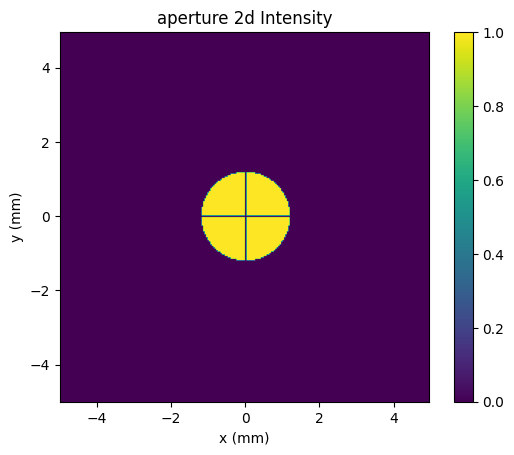

100%|█████████████████████████████████████████| 400/400 [00:11<00:00, 34.73it/s]


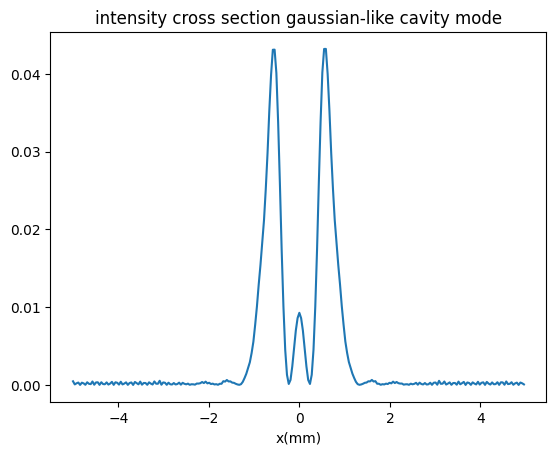

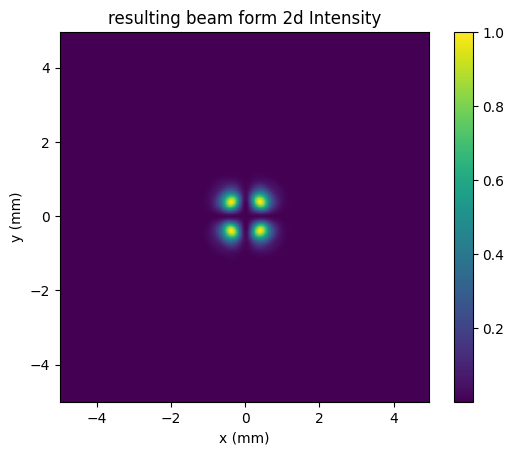

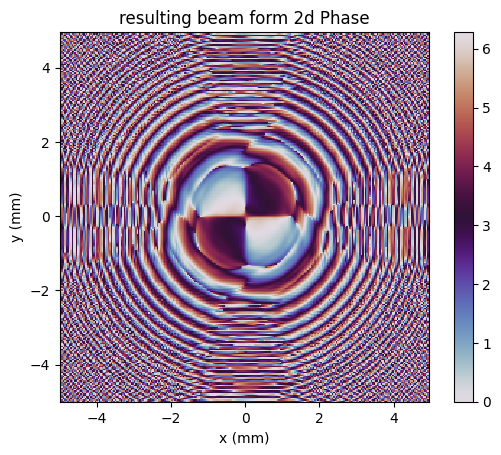

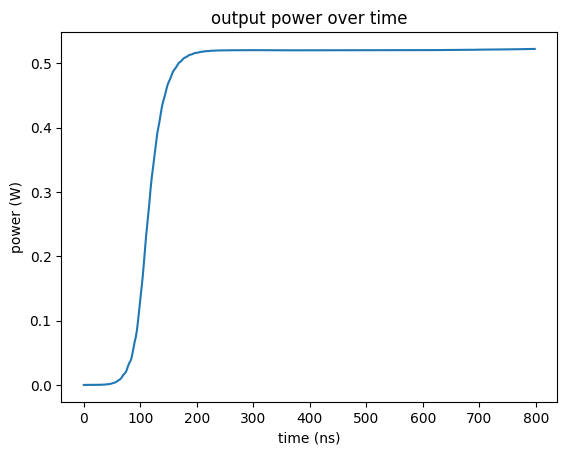

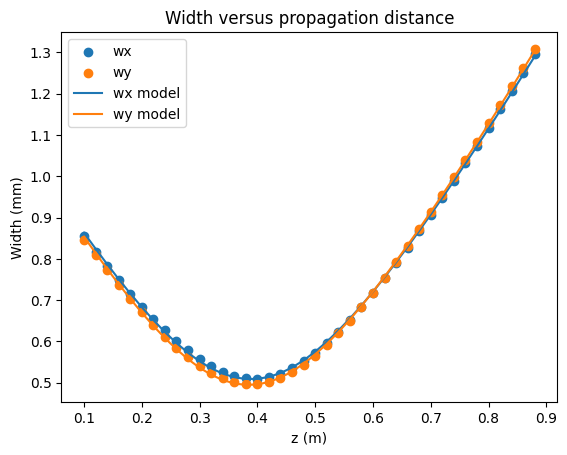

Fit Parameters (x/y)
[5.08529676e-04 3.85951160e+00 3.88810567e-01]
[4.94457919e-04 3.79049868e+00 3.85128052e-01]


In [18]:
sim_aperture(#...)

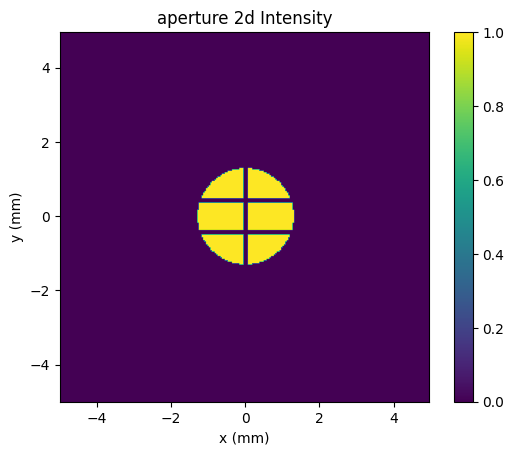

100%|█████████████████████████████████████████| 400/400 [00:11<00:00, 34.48it/s]


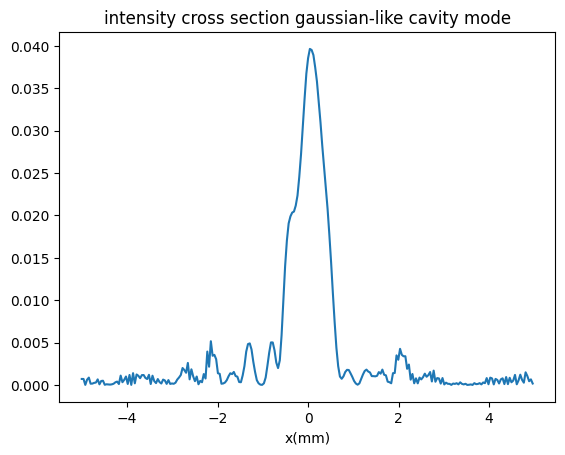

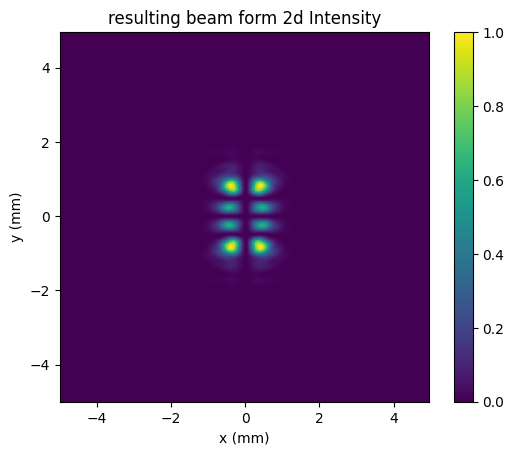

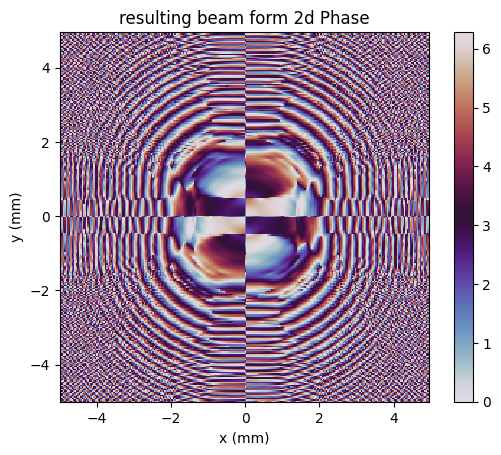

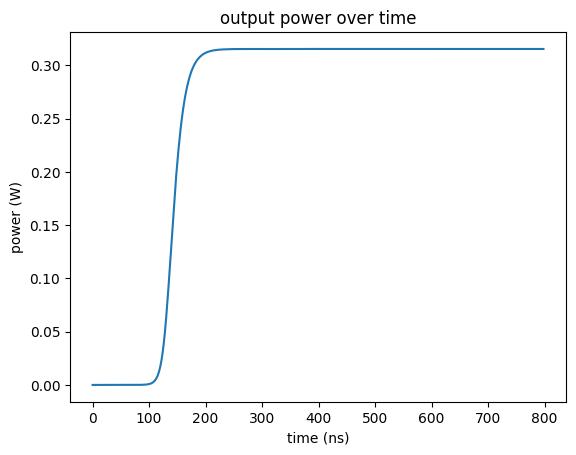

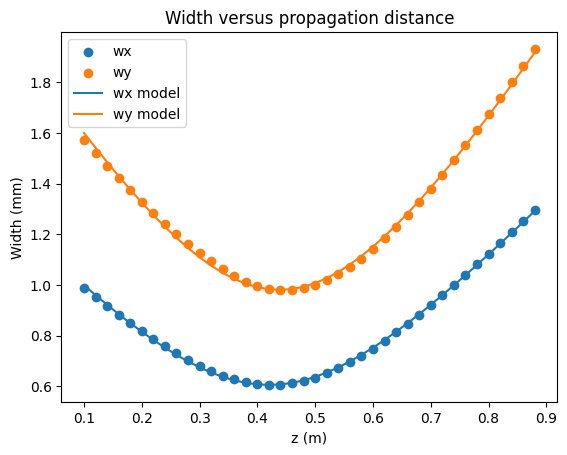

Fit Parameters (x/y)
[6.05083614e-04 4.72058851e+00 4.20033122e-01]
[9.80745556e-04 1.15115001e+01 4.38593275e-01]


In [19]:
sim_aperture(#...)

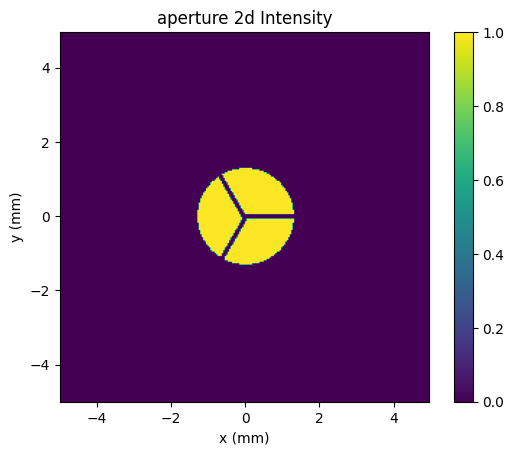

100%|█████████████████████████████████████████| 400/400 [00:12<00:00, 31.05it/s]


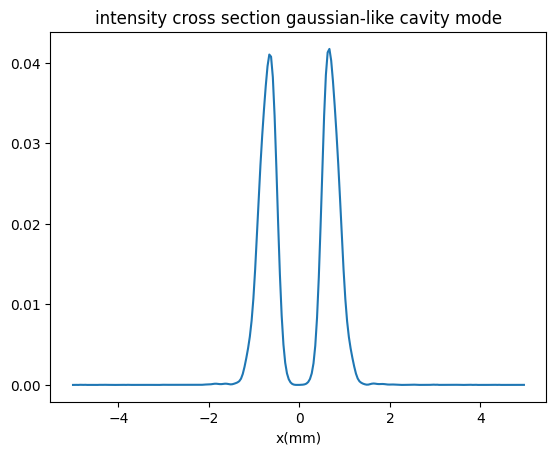

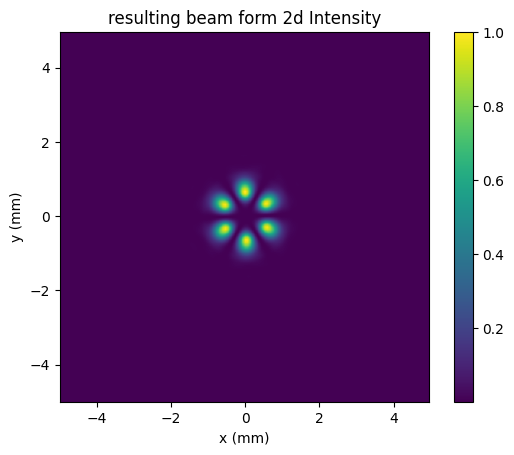

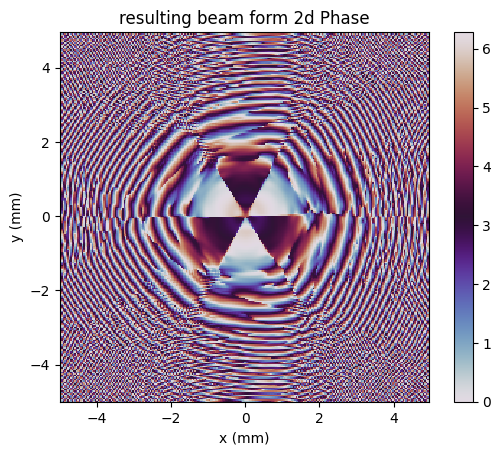

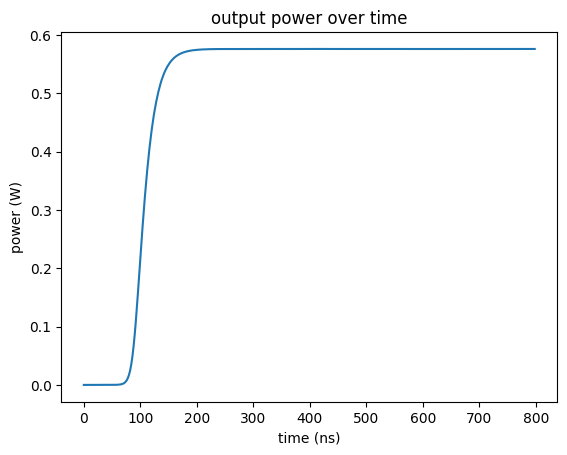

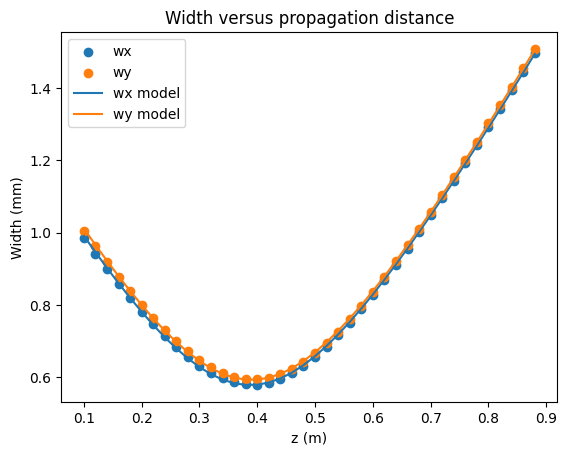

Fit Parameters (x/y)
[5.78179169e-04 5.08101826e+00 3.87632888e-01]
[5.92623493e-04 5.25788512e+00 3.90150517e-01]


In [20]:
sim_aperture(spider_aperture(#...)